In [1]:
# %load preprocess.py

import spacy
from spacy.tokens import DocBin
import pickle

nlp = spacy.blank("en")

# Load Data
training_data = pickle.load(open('./data/TrainData.pickle','rb'))
testing_data = pickle.load(open('./data/TestData.pickle','rb'))
                                 

# the DocBin will store the example documents
db = DocBin()
for text, annotations in training_data:
    doc = nlp(text)
    ents = []
    for start, end, label in annotations['entities']:
        span = doc.char_span(start, end, label=label)
        ents.append(span)
    doc.ents = ents
    db.add(doc)
db.to_disk("./data/train.spacy")

# the DocBin will store the example documents
db_test = DocBin()
for text, annotations in testing_data:
    doc = nlp(text)
    ents = []
    for start, end, label in annotations['entities']:
        span = doc.char_span(start, end, label=label)
        ents.append(span)
    doc.ents = ents
    db_test.add(doc)
db_test.to_disk("./data/test.spacy")

In [2]:
!python -m spacy init fill-config ./base_config.cfg ./config.cfg

[+] Auto-filled config with all values
[+] Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [3]:
!python -m spacy train .\config.cfg --output .\output\ --paths.train .\data\train.spacy --paths.dev data/test.spacy --paths.dev .\data\test.spacy --gpu-id 0

[i] Saving to output directory: output
[i] Using GPU: 0

=========================== Initializing pipeline ===========================
[+] Initialized pipeline

============================= Training pipeline =============================
[i] Pipeline: ['transformer', 'ner']
[i] Initial learn rate: 0.0
E    #       LOSS TRANS...  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  -------------  --------  ------  ------  ------  ------
  0       0         103.02    113.45    0.00    0.00    0.00    0.00
 11     200      113857.69  127526.20   78.74   79.67   77.83    0.79
 22     400       14771.74  19558.29   82.62   80.07   85.33    0.83
 33     600        2829.29   4834.89   82.26   79.80   84.87    0.82
 45     800        1433.30   2340.22   82.54   78.01   87.64    0.83
 56    1000         771.21   1342.46   82.74   81.66   83.83    0.83
 67    1200         603.03    907.08   82.17   79.63   84.87    0.82
 79    1400         424.21    752.85   82.86   80.72   85.10    0.83
 90  

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


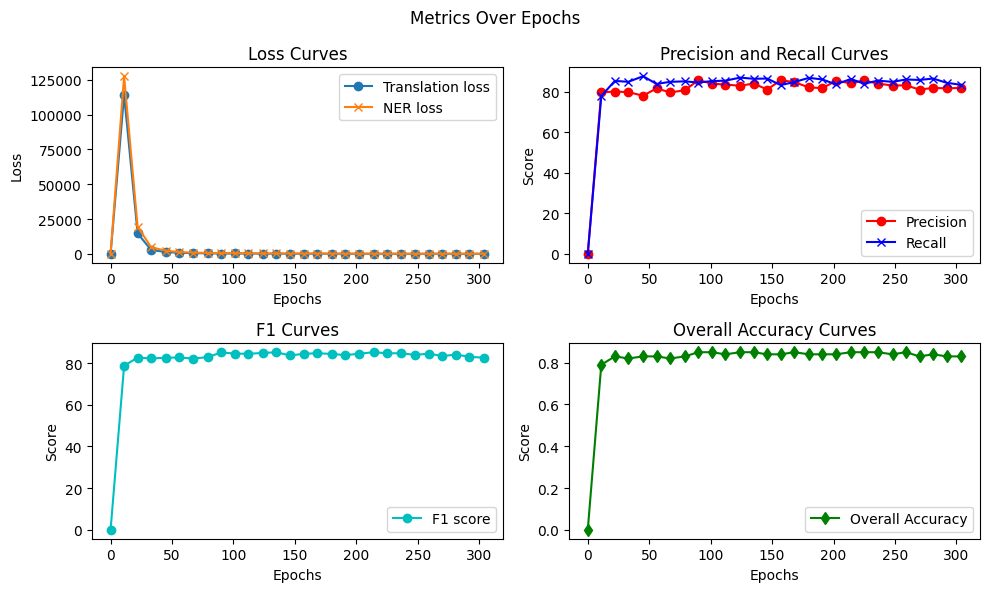

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

epochs = [0, 11, 22, 33, 45, 56, 67, 79, 90, 101, 112, 124, 135, 146, 157, 168, 180, 191, 202, 214, 225, 236, 248, 259, 270, 281, 292, 304]
iteration_no = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000, 5200, 5400]
loss_translation = [103.02, 113857.69, 14771.74, 2829.29, 1433.3, 771.21, 603.03, 424.21, 302.26, 327.72, 296.32, 204.68, 222.52, 153.84, 149.63, 216.74, 143.49, 127.06, 131.42, 86.53, 119.55, 86.12, 90.19, 88.98, 118.16, 88.25, 73.84, 127.76]
loss_ner = [113.45, 127526.2, 19558.29, 4834.89, 2340.22, 1342.46, 907.08, 752.85, 517.11, 580.11, 446.94, 355.46, 346.98, 278.59, 251.43, 317.64, 207.72, 197.65, 173.04, 132.14, 166.66, 128.39, 130.09, 121.01, 154.86, 125.91, 114.71, 160.64]
ents_f = [0, 78.74, 82.62, 82.26, 82.54, 82.74, 82.17, 82.86, 85.12, 84.58, 84.47, 84.89, 85.19, 83.69, 84.43, 84.76, 84.4, 83.85, 84.48, 85.23, 84.73, 84.72, 83.95, 84.56, 83.34, 84.11, 83.02, 82.61]
ents_p = [0, 79.67, 80.07, 79.8, 78.01, 81.66, 79.63, 80.72, 85.71, 83.96, 83.52, 82.93, 84.04, 81.06, 85.63, 84.76, 82.1, 81.78, 85.38, 84.22, 85.53, 84, 83.05, 83.15, 81.03, 81.86, 81.68, 81.86]
ents_r = [0, 77.83, 85.33, 84.87, 87.64, 83.83, 84.87, 85.1, 84.53, 85.22, 85.45, 86.95, 86.37, 86.49, 83.26, 84.76, 86.84, 86.03, 83.6, 86.26, 83.95, 85.45, 84.87, 86.03, 85.8, 86.49, 84.41, 83.37]
score = [0, 0.79, 0.83, 0.82, 0.83, 0.83, 0.82, 0.83, 0.85, 0.85, 0.84, 0.85, 0.85, 0.84, 0.84, 0.85, 0.84, 0.84, 0.84, 0.85, 0.85, 0.85, 0.84, 0.85, 0.83, 0.84, 0.83, 0.83]

# Create the dataframes
loss_trans_df = pd.DataFrame({'epochs': epochs, 'loss': loss_translation})
loss_ner_df = pd.DataFrame({'epochs': epochs, 'loss': loss_ner})
ents_f_df = pd.DataFrame({'epochs': epochs, 'f1': ents_f})
ents_p_df = pd.DataFrame({'epochs': epochs, 'precision': ents_p})
ents_r_df = pd.DataFrame({'epochs': epochs, 'recall': ents_r})
score_df = pd.DataFrame({'epochs': epochs, 'score': score})

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('Metrics Over Epochs')

# Plot the loss curves
axes[0, 0].plot(loss_trans_df['epochs'], loss_trans_df['loss'], label='Translation loss', marker='o')
axes[0, 0].plot(loss_ner_df['epochs'], loss_ner_df['loss'], label='NER loss', marker='x')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Loss Curves')
axes[0, 0].legend()

# Plot precision and recall curves
axes[0, 1].plot(ents_p_df['epochs'], ents_p_df['precision'], label='Precision', marker='o', color='r')
axes[0, 1].plot(ents_r_df['epochs'], ents_r_df['recall'], label='Recall', marker='x', color='b')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_title('Precision and Recall Curves')
axes[0, 1].legend()

# Plot the F1 curve
axes[1, 0].plot(ents_f_df['epochs'], ents_f_df['f1'], label='F1 score', marker='o', color='c')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('F1 Curves')
axes[1, 0].legend()

# Plot the overall score curve
axes[1, 1].plot(score_df['epochs'], score_df['score'], label='Overall Accuracy', marker='d', color='g')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Overall Accuracy Curves')
axes[1, 1].legend()


# Tighten the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
# Data Visualization

from spacy import displacy

# Load your trained spaCy NER model
nlp = spacy.load('.\output\model-best')

# Create a Doc object from your text
doc = nlp('Hi my name is Mohammad Saiful Islam, Here is my phone number 01919981999. I am a manager at SBC GYM. This is my email mrt.saiful@gmail.com. I my organization website is www.sbcgym.com.')

# Visualize the entities in your text
displacy.render(doc, style='ent', jupyter=True)
